# Project 4: Poisonous Mushrooms

**Solution**

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 examples, where each describes a mushroom by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. The feature space has been binarized. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using k-means and density estimation with Gaussian mixture models (GMM). Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please **prepare your own write-up and write your own code**.

## Grading
---
- Make sure to answer every part in every question.
 - There are 6 equally weighted questions.
 - Read carefully what is asked including the notes.
 - Additional points may be deducted if:
   - the code is not clean and well commented, 
   - and if the functions or answers are too long.

 ## Requirements:
---
1. Comment your code.
1. All graphs should have titles, label for each axis, and if needed a legend. It should be understandable on its own.
1. All code must run on colab.research.google.com
1. You should not import any additional libraries.
1. Try and minimize the use of the global namespace (meaning keep things in functions).

In [1]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

In [2]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [3]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [4]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


### Question 1:PCA and fraction of total variance
---

1. Do a principal components analysis on the data.
1. Print what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].
1. Show a lineplot of fraction of total variance vs. number of principal components, for all possible numbers of principal components.
1. You only need to call PCA.fit once.

Notes:
* The pandas DataFrame [cumsum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumsum.html) function may be helpful.
* You can use `PCA` to produce a PCA analysis.


--------------------------------- Q1.2 ---------------------------------

k: 1 	 Fraction total variance explained by (k): 0.16404331279333803
k: 2 	 Fraction total variance explained by (k): 0.13323478869447128
k: 3 	 Fraction total variance explained by (k): 0.10173456521957933
k: 4 	 Fraction total variance explained by (k): 0.07063356431384125
k: 5 	 Fraction total variance explained by (k): 0.03866644400145895
k: 10 	 Fraction total variance explained by (k): 0.022305877699267486
k: 20 	 Fraction total variance explained by (k): 0.01144168808354525
k: 30 	 Fraction total variance explained by (k): 0.00697365859704247
k: 40 	 Fraction total variance explained by (k): 0.00439758838608159
k: 50 	 Fraction total variance explained by (k): 0.002044288540759539

--------------------------------- Q1.3 ---------------------------------



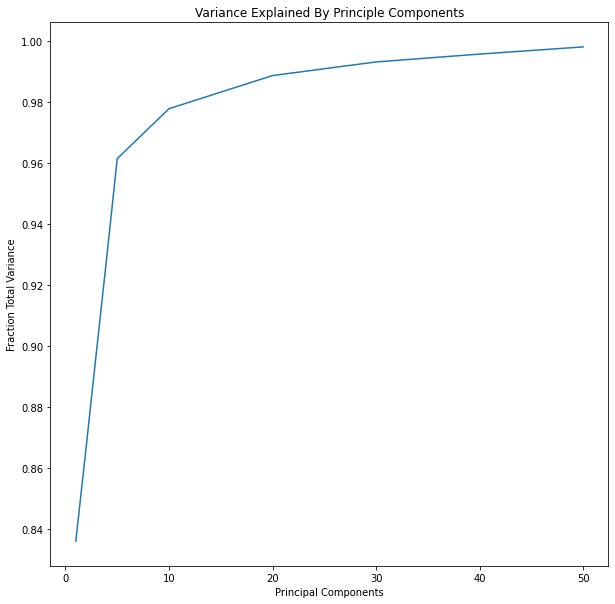

In [5]:
def Q1():

  ### STUDENT START ###
  
  ##### Q1.3 #####

  # Plots a 2D graph showing the fraction of total variance explained 
  # as a function of the number of principle components used. 
  def plot(x_axis, y_axis):
    plt.figure(figsize = (10,10))
    plt.plot(x_axis, y_axis)
    plt.title("Variance Explained By Principle Components")
    plt.xlabel("Principal Components")
    plt.ylabel("Fraction Total Variance")
    plt.show()

  ##### Q1.1 & Q1.2 #####

  # A pre-defined list of principle components (k) and empty list to 
  # store computed variances based on (k) values is defined.
  k = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
  variances = []

  # Computes a principle component analysis on the training data using
  # pre-defined values of (k) above. The fraction of total variance
  # explained is calculated and printed for analysis purposes.
  print()
  print("--------------------------------- Q1.2 ---------------------------------")
  print()
  for i in k: 
    pca = PCA(n_components = i)
    pca_model = pca.fit_transform(train_data)
    variance_ratio = pca.explained_variance_ratio_[i-1]
    variances.append(1 - variance_ratio)
    print("k:", i, "\t Fraction total variance explained by (k):", variance_ratio)
  
  # Plots the results of the principle component analysis above. 
  print()
  print("--------------------------------- Q1.3 ---------------------------------")
  print()
  plot(k, variances)

  ### STUDENT END ###

Q1()

### Question 2: PCA for visualization

PCA can be very useful for visualizing data. 
1. Project the training data down to 2 dimensions and show as a square scatterplot.
  - Show poisonous examples (labeled 1) in red and non-poisonous examples in green (labeled 0)
  - Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

Notes:
* You can use `PCA` to produce a PCA analysis.
* Be sure to add a title, axis labels and a legend to your graph.


--------------------------------- Q2.1 ---------------------------------



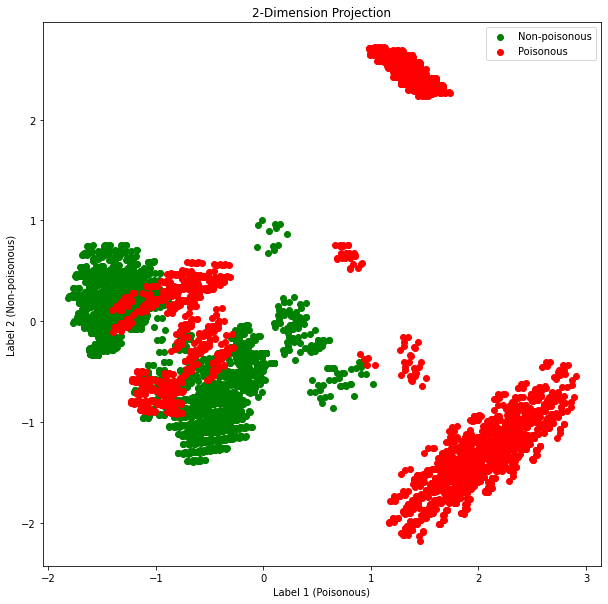

In [6]:
def Q2():   

  ### STUDENT START ###

  ##### Q2.1 #####

  # Computes a principle analysis on the training
  # data using 2 principle components. 
  pca = PCA(n_components = 2)
  pca_model = pca.fit_transform(train_data)

  np_list_1 = []
  p_list_1 = []
  p_list_2 = []
  np_list_2 = []

  # Builds two separate lists - one for non-poisonous and 
  # the other for poisonous mushrooms, for purposes of 
  # creating a scatter plot in the section below. 
  for i in range(pca_model.shape[0]):
    if (train_labels[i] == 0):
      np_list_1.append(pca_model[i][0])
      p_list_1.append(pca_model[i][1])
    else:
      p_list_2.append(pca_model[i][1])
      np_list_2.append(pca_model[i][0])    

  # Creates a scatter plot of a 2-dimensional principle components analysis.
  print()
  print("--------------------------------- Q2.1 ---------------------------------")
  print()
  plt.figure(figsize = (10,10))
  plt.scatter(np_list_1[:len(np_list_1)], p_list_1[:len(np_list_1)], color = "green", label = "Non-poisonous")
  plt.scatter(np_list_2[:len(np_list_2)], p_list_2[:len(np_list_2)], color = "red", label = "Poisonous")
  plt.title("2-Dimension Projection")
  plt.xlabel("Label 1 (Poisonous)")
  plt.ylabel("Label 2 (Non-poisonous)")
  plt.legend()
  plt.show()

  ### STUDENT END ###

Q2()

### Question 3: Visualizing GMMs
---

1. Fit a k-means cluster model with 6 clusters over the 2d projected data. 
  - As in part 2, show as a square scatterplot with the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  
  - For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

Notes:
* You can use `KMeans` to produce a k-means cluster analysis.
* You can use `linalg.norm` to determine distance (dissimilarity) between observations.


--------------------------------- Q3.1 ---------------------------------



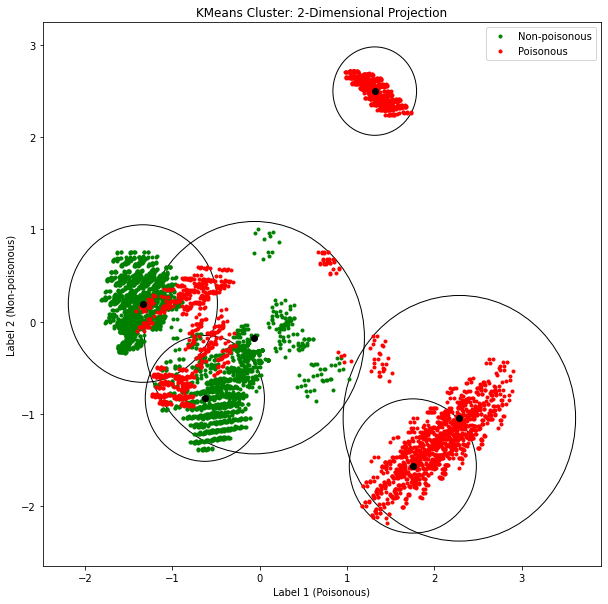

In [7]:
from scipy.linalg.special_matrices import circulant

def Q3():   

  ### STUDENT START ###

  ##### Q3.1 #####

  # Computes a principle analysis on the training
  # data using 2 principle components. 
  pca = PCA(n_components = 2)
  pca_model = pca.fit_transform(train_data)

  # Creates a scatter plot of a 2-dimensional principle components analysis.
  non_poisonous = pca_model[train_labels == 0] 
  poisonous = pca_model[train_labels == 1]
  fig, ax = plt.subplots(figsize = (10,10))
  ax = plt.gca()
  ax.plot(non_poisonous[:,0], non_poisonous[:,1], 'g.', label = "Non-poisonous")
  ax.plot(poisonous[:,0], poisonous[:,1], 'r.', label = "Poisonous")

  # Produces KMeans clusters on data, computes the centroids for all  
  # 6 clusters, and plots in scatter plot. 
  km = KMeans(n_clusters = 6)
  km.fit(pca_model)
  km_prediction = km.predict(pca_model)
  non_poisonous_centroid = km.cluster_centers_[:,0]
  poisonous_centroid = km.cluster_centers_[:,1]
  km_pca = pca_model[km_prediction == 0,]
  plt.scatter(non_poisonous_centroid, poisonous_centroid, zorder = 7, c = 'black')

  # Calculates and draws a circle around each cluster illustrating the 
  # maximum distance (dissimilarity) between observations. 
  for count, centroid in enumerate(km.cluster_centers_):
    km_pca_model = pca_model[km_prediction == count,] 
    distance = np.linalg.norm(km_pca_model - centroid, axis = 1)
    max_distance = max(distance)
    circle = plt.Circle(centroid, radius = max_distance, fill = False)
    ax.add_patch(circle)

  print()
  print("--------------------------------- Q3.1 ---------------------------------")
  print()
  plt.title("KMeans Cluster: 2-Dimensional Projection")
  plt.xlabel("Label 1 (Poisonous)")
  plt.ylabel("Label 2 (Non-poisonous)")
  plt.legend()
  plt.show()

  ### STUDENT END ###

Q3()

### Question 4: Understanding GMMs with Density Plots
---

1. Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data. 
  - Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  
  - Show a 4x4 grid of square-shaped plots of the estimated density contours. 
    - Each row showing a different number of mixture components. 
    - Each column showing a different convariance matrix type.  
1. Be sure to add a title for each plot in the grid to indicate what parameters were used.
1. How are the covariance types 'tied' and 'full' different? How do you see it in the plots?

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `contour` in combination with other methods to plot contours, like in this example: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py
* You can use `contour` without the `norm` and `levels` parameters. 


---------------------------------------------------------- Q4.1 & Q4.2 --------------------------------------------------------



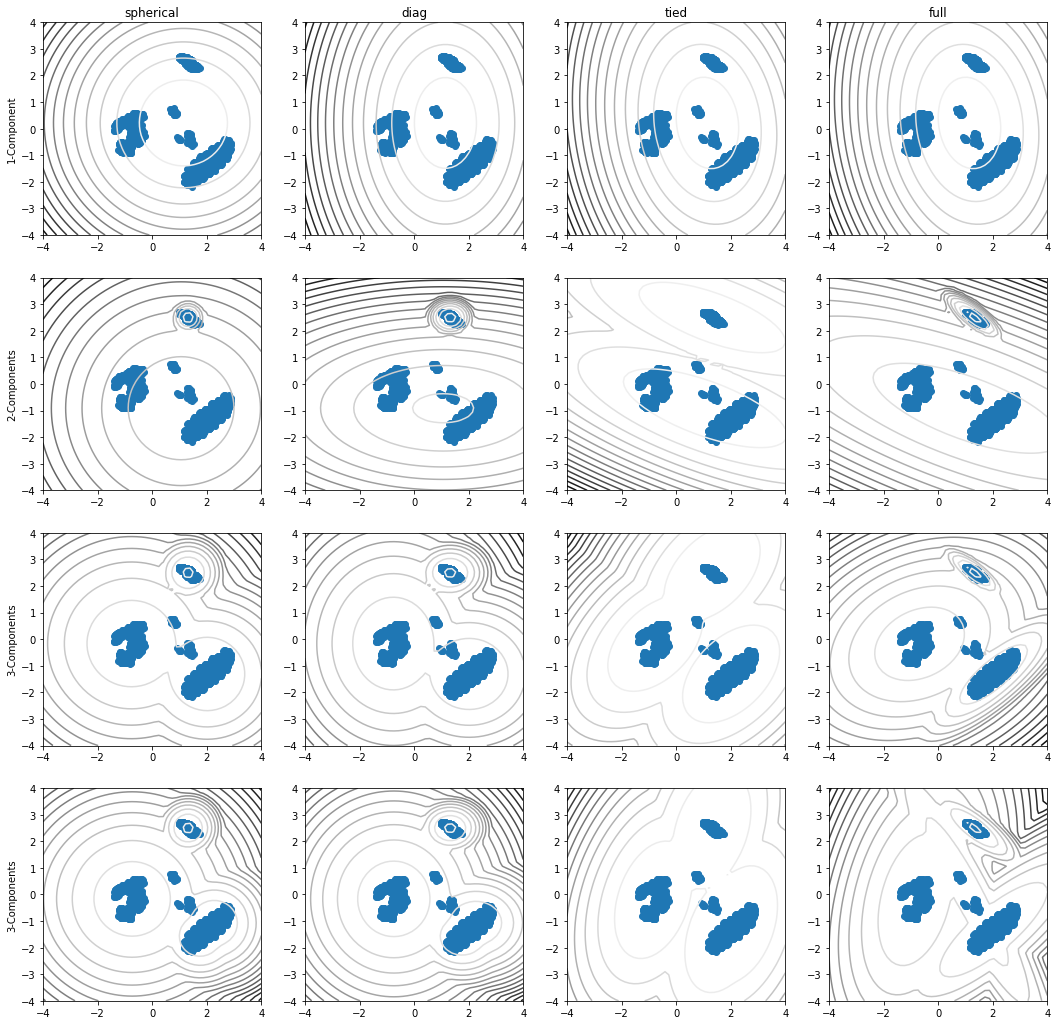

In [8]:
def Q4():

  ### STUDENT START ###
  
  ##### Q4.1 & 4.2 #####    

  # Computes a principle component analysis on the training 
  # data using the first 2 principle components and returns
  # only the positive (poisonous) examples.
  pca = PCA(n_components = 2) 
  pca_model = pca.fit_transform(train_data)
  pca_model = pca_model[train_labels == 1] 

  # Creates a 4x4 subplot showing each convariance types.
  fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize = (18, 18))
  col_label = ['1', '2', '3', '4']

  # Defines the coveriance types and the labels for the x-axis.
  covariance_types = ["spherical","diag","tied","full"]
  val = list(zip(ax[0], covariance_types))
  for ptr, string in val:
    ptr.set_title(string)
  
  # Labels for the y-axis for each subplot.
  ax[:,0][0].set_ylabel("1-Component")
  ax[:,0][1].set_ylabel("2-Components")
  ax[:,0][2].set_ylabel("3-Components")
  ax[:,0][3].set_ylabel("3-Components")

  # Generates a Gaussian mixture model for each of the covariance types
  # defined above and stores value in list to be plotted in subsequent step.
  gmm_list = []
  for i in range(1, 5):
    for j in covariance_types:
      gmm_val = [GaussianMixture(n_components = i, covariance_type = j, random_state = 12345).fit(pca_model)]
      gmm_list.append(gmm_val) 
  gmm_2d_list = np.concatenate(gmm_list)

  # Show a 4x4 grid of square-shaped plots of the estimated density 
  # contours for each covariance type defined above.
  for count, gmm in enumerate(gmm_2d_list):
    ax = ax.flatten()
    x = np.linspace(-4., 4) 
    y = np.linspace(-4., 4)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = -gmm.score_samples(XX)
    Z = Z.reshape(X.shape)
    ax[count].contour(X, Y, Z, 15, cmap = "binary")
    ax[count].scatter(pca_model[:, 0], pca_model[:, 1])

  print()
  print("---------------------------------------------------------- Q4.1 & Q4.2 --------------------------------------------------------")
  print()
  plt.show()

  ### STUDENT END ###

Q4()

**Answer:** A "full" covariance type means each principle component has its own general covariance matrix and can independently adopt any position and shape (i.e. sphere, ellipse, etc.) around each cluster. A "tied" covariance type means all components share the same general covariance matrix and must have the same shape, however, the shape can be anything (i.e. sphere, ellipse, etc.) around each cluster. We can see the difference between the "tied" and "full" covariance type plots where the subplots in the "tied" column follow the same shape around each cluster (i.e. 1-component: sphere, 2-4 components: ellipse). The "full" covariance subplots show differing shapes around each cluster (i.e. 1-component: sphere, 2-components: different size ellipse, 3-components: sphere and ellipse, 4-component: different ellipses.). 

### Question 5: Using Unsupervised models for classification...?
---

1. Fit two Gaussian mixture models:
  - On your 2d projected training data. 
    - Form a subset of all the poisonous examples and fit one GMM (gmm_poison).
    - Form a subset of all the non-poisonous examples and fit another GMM (gmm_nonpoison).
  - Use 4 mixture components and full convariance for each model.  
1. Use the above trained GMMs to classify examples in your test set:
   - For each example in the test set
     - Measure how likely it is to have been "generated" by gmm_poison and gmm_nonpoison (using score_samples).
     - Predict the more likely label.
  - You can use score_samples.
  - You can do this without a for loop which will be more efficient.
1. What is the accuracy of the predictions on the test data? (we expect it to be about 0.95)

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `GaussianMixture`'s `score_samples` method to find the probabilities.

In [9]:
def Q5():  

  ### STUDENT START ###
  
  # Computes a principle component analysis on the training
  # data using 2 principle components and computes a transform
  # on the test data to be used in subsequent sections.
  pca = PCA(n_components = 2)
  pca_train = pca.fit_transform(train_data)
  pca_test = pca.transform(test_data)

  ##### Q5.1 #####

  # Creates a subset of all poisonous mushrooms, creates a Gaussian
  # mixture model using 4 mixture components and full convariance.
  train_pca_poisonous = pca_train[train_labels == 1]
  gmm_poisonous = GaussianMixture(n_components = 4, covariance_type = "full", random_state = 12345).fit(train_pca_poisonous)

  # Creates a subset of all non-poisonous mushrooms, creates a Gaussian
  # mixture model using 4 mixture components and full convariance.
  train_pca_nonpoisonous = pca_train[train_labels == 0] 
  gmm_nonpoisonous = GaussianMixture(n_components = 4, covariance_type = "full", random_state = 12345).fit(train_pca_nonpoisonous)

  ##### Q5.2 #####

  # Uses the trained Gausian mixture models above to make predictions
  # on the test set data, for both poisonous and non-poisonous 
  # mushrooms. Uses score_samples method to measure how likely it is
  # to have been generated by gmm_poisonous or gmm_nonpoisonous.
  predict_poisonous = gmm_poisonous.score_samples(pca_test)
  predict_nonpoisonous = gmm_nonpoisonous.score_samples(pca_test) 

  # From the prediction above, the following predicts the more likely label.
  # and returns the corresponding accuracy from the prediction.
  correct_predictions = 0
  for i in range(len(pca_test)):
    if (predict_poisonous[i] > predict_nonpoisonous[i]):
      prediction = 1
    else:
      prediction = 0
    if (prediction == test_labels[i]):
      correct_predictions += 1
  
  ##### Q5.3 #####

  # Prints the accuracy of the classification.
  accuracy = (correct_predictions / len(pca_test))
  print("----------- Q5.3 -----------")
  print()
  print("Accuracy:", accuracy)

  ### STUDENT END ###

Q5()

----------- Q5.3 -----------

Accuracy: 0.9501779359430605


### Question 6: Understanding the GMM parameters
---

1. Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters.  Do this by varying the number of PCA components, the number of GMM components, and the covariance type.
1. Print the best configuration and accuracy.
1. Plot a scatter plot of accuracy vs #params.
1. Bonus: Provide a better visualization by showing all four: accuracy, number of parameters, the covariance type and the number of PCA dimensions.



Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* [This spreadsheet](https://docs.google.com/spreadsheets/d/1LTEOU7q_Tgs4bX_3o2ePjDQrTRToZoc1J5XLlaRbmI0/edit?usp=sharing) should help (accessible from your google @berkeley.edu account)

* Spherical - Each GMM component has a mean per dimension, and one variance. 
* Diag - Each GMM component has a mean per dimension and a variance for each dimension.
* full - Each GMM component has a mean per dimension and a "full" covariance matrix. Only the covariance matrix is symmetric, so its $[i,j]$ entry would equal to its $[j,i]$ entry.
* tied - Finally, tied has all components share a single covariance matrix. So each GMM component has a mean per dimension but they all share the same 'full' covariance matrix.

------------------------------------------------ Q6.1 & Q6.4 ------------------------------------------------

| PCA Components: 1 | GMM Components:  1 | Covariance: spherical | Total Parameters:  4 | Accuracy: 0.84431 |
| PCA Components: 1 | GMM Components:  1 | Covariance: diag      | Total Parameters:  4 | Accuracy: 0.84431 |
| PCA Components: 1 | GMM Components:  1 | Covariance: tied      | Total Parameters:  4 | Accuracy: 0.84431 |
| PCA Components: 1 | GMM Components:  1 | Covariance: full      | Total Parameters:  4 | Accuracy: 0.84431 |
| PCA Components: 1 | GMM Components:  2 | Covariance: spherical | Total Parameters:  8 | Accuracy: 0.89858 |
| PCA Components: 1 | GMM Components:  2 | Covariance: diag      | Total Parameters:  8 | Accuracy: 0.89858 |
| PCA Components: 1 | GMM Components:  2 | Covariance: tied      | Total Parameters:  6 | Accuracy: 0.88345 |
| PCA Components: 1 | GMM Components:  2 | Covariance: full      | Total Parameters:  8 | Accuracy: 0.89858 |
| PCA Com

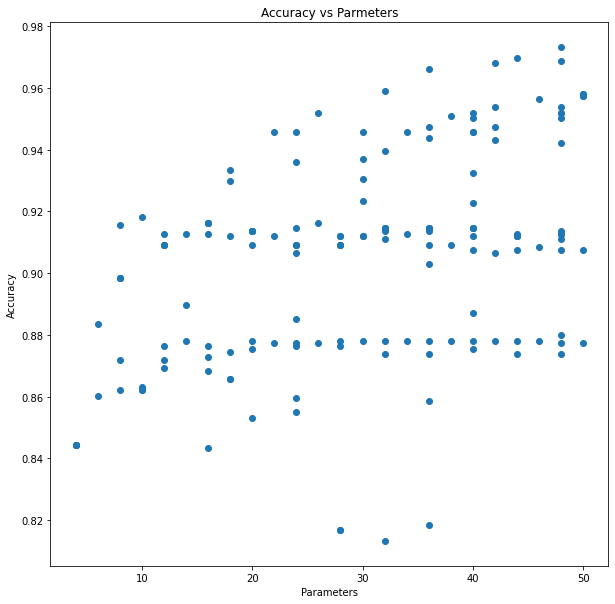

In [10]:
from matplotlib.lines import Line2D

def Q6():

  ### STUDENT START ###

  # Computes the total number of parameters used when given variables
  # pca, gmm and covariance type in subsequent section. 
  def calculate_parameters(num_pca_param, num_gmm_param, covariance_type):
    num_mean_components = num_pca_param * num_gmm_param 
    if covariance_type == "full":
      num_covariance_components = ((num_pca_param * (num_pca_param + 1)) / 2) * num_gmm_param
    if covariance_type == "diag":
      num_covariance_components = num_pca_param * num_gmm_param
    if covariance_type == "spherical":
      num_covariance_components = num_gmm_param
    if covariance_type == "tied": 
      num_covariance_components = (num_pca_param * (num_pca_param + 1) / 2)
    num_params = (num_mean_components + num_covariance_components) * 2
    return int(num_params)

  num_pca_list = []
  num_gmm_list = []
  num_param_list = []
  covariance_list = []
  accuracy_list = []

  # Computes a principle analysis on the training data using k values in range
  # 1 - 50, and computes a transform on the test data for subsequent sections.
  for num_pca in range(1, 51):
    pca = PCA(n_components = num_pca)
    pca_train = pca.fit_transform(train_data)
    pca_test = pca.transform(test_data)

    # Creates a subset of all poisonous and non-poisonous mushrooms.
    train_pca_poisonous = pca_train[train_labels == 1] 
    train_pca_nonpoisonous = pca_train[train_labels == 0] 

    # Iterates through combinations of covariance values given
    # k components in range 1-50.
    for num_gmm in range(1, 51):
      for covariance in ["spherical", "diag", "tied", "full"]:       
        n_params = calculate_parameters(num_pca, num_gmm, covariance) 
        if (n_params > 50):
          continue

        # Creates a Gaussian mixture model based on number of principle components
        # in range 1 - 50, using 4 mixture components and full covariance.
        gmm_poison = GaussianMixture(n_components = num_gmm, covariance_type = covariance, random_state = 12345).fit(train_pca_poisonous)
        gmm_nonpoisonous = GaussianMixture(n_components = num_gmm, covariance_type = covariance, random_state = 12345).fit(train_pca_nonpoisonous)
        
        # Uses the trained Gausian mixture models above to make predictions
        # on the test set data, for both poisonous and non-poisonous 
        # mushrooms. Uses score_samples method to measure how likely it is
        # to have been generated by gmm_poisonous or gmm_nonpoisonous. 
        prediction_poisonous = gmm_poison.score_samples(pca_test) 
        prediction_nonpoisonous = gmm_nonpoisonous.score_samples(pca_test)

        # Calculates number of correct predictions to be used in section below. 
        correct_predictions = 0
        for i in range(len(pca_test)):
          if prediction_poisonous[i] > prediction_nonpoisonous[i]:
            prediction = 1
          else:
            prediction = 0
          if prediction == test_labels[i]:
            correct_predictions += 1
    
        # Limits number of parameters to no more than 50 while storing
        # number of principle components, gmm, coveriance type, accuracy
        # and number of parameters for each iteration. 
        accuracy = correct_predictions / len(pca_test)
        if n_params <= 50:  
            num_pca_list.append(num_pca)
            num_gmm_list.append(num_gmm)
            covariance_list.append(covariance)
            accuracy_list.append(accuracy)
            num_param_list.append(n_params)

  ##### Q6.1 & 6.4 #####

  # Displays a series of experiments that finds the Gaussian mixture models 
  # result in the best accuracy with no more than 50 parameters. This is done
  # by varying the number of PCA and GMM components, and covariance type. 
  print("------------------------------------------------ Q6.1 & Q6.4 ------------------------------------------------")
  print()
  highest_accuracy = 0
  best_j = 0
  for j in range(len(num_pca_list)):
    results = '| PCA Components: {1} | GMM Components: {0:2d} | Covariance: {2:9s} | Total Parameters: {3:2d} | Accuracy: {4:3.5f} |'.format(
        num_gmm_list[j], num_pca_list[j], covariance_list[j], num_param_list[j], accuracy_list[j])
    if (accuracy_list[j] > highest_accuracy):
      highest_accuracy = accuracy_list[j]
      best_j = j
    print(results)
  
  ##### Q6.2 #####

  # Displays PCA, GMM and covariance configuration that produces highest accuracy.
  print()
  best_configuration = '| PCA Components: {1} | GMM Components: {0:2d} | Covariance: {2:9s} | Total Parameters: {3:2d} | Accuracy: {4:3.5f} |'.format(
        num_gmm_list[best_j], num_pca_list[best_j], covariance_list[best_j], num_param_list[best_j], accuracy_list[best_j])
  print("---------------------------------------------------- Q6.2 ----------------------------------------------------")
  print()
  print(best_configuration)

  ##### Q6.3 #####

  # Creates a scatter plot of the accuracy versus total parameters.
  print()
  print("---------------------------------- Q6.3 ----------------------------------")
  print()
  plt.figure(figsize = (10,10))
  plt.scatter(num_param_list, accuracy_list)
  plt.title('Accuracy vs Parmeters')
  plt.xlabel('Parameters')
  plt.ylabel('Accuracy')
  plt.show()

  ### STUDENT END ###

Q6()

## Resources & Citations

1.   Collaborated with Satya Srinivas and CB Bangalore on assignment.
2.   https://setosa.io/ev/principal-component-analysis/
2.   https://builtin.com/data-science/step-step-explanation-principal-component-analysis
3.   https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 
4.   https://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca
5.   https://towardsdatascience.com/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0
6.   https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/
7.   https://www.geeksforgeeks.org/implementing-pca-in-python-with-scikit-learn/ 
8.   http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py
9.   https://www.datacamp.com/tutorial/principal-component-analysis-in-python   
10.   https://stats.stackexchange.com/questions/326671/different-covariance-types-for-gaussian-mixture-models#:~:text='full'%20(each%20component%20has,has%20its%20own%20single%20variance)
11. https://scikit-learn.org/stable/modules/mixture.html 
12. https://www.youtube.com/watch?v=EWd1xRkyEog 



